In [1]:
# example_fetcher.ipynb
# Authors: Stephan Meighen-Berger
# Shows the capabilities of the package. This uses the fetcher function

In [2]:
# Import generic stuff
import numpy as np
import matplotlib.pyplot as plt
import sys
from tqdm import tqdm

In [3]:
# Font style
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=False)

In [4]:
# Import package
# Adding path to module
sys.path.append("../")
# Module imports
# TODO: Fix this
from fennel.fennel import Fennel
from fennel.config import config
# picture path
PICS = '../pics/'

In [5]:
# Plotting standards
std_size = 6.  # Size of the plot
fontsize = 20.  # Fontsize in the plot
lw=1.  # Linewidth
h_length=1  # Handle length for the legends
export_dpi = 500  # Dpi for the image export

In [6]:
# Creating a fennel object
fennel_instance = Fennel()

In [7]:
# Energies of interest
energy_ids = [0, 10, 20, 30, 40]
egrid = config['advanced']["energy grid"]
track_lengths = config['advanced']['track lengths']
track_ids = [30]
wavelengths = config['advanced']['wavelengths']
angle_grid = config['advanced']['angles']
zgrid = config['advanced']['z grid']

In [8]:
test_energy = 1e3

In [9]:
# Track example
track_counts, track_angles = fennel_instance.track_yields(energy=test_energy, deltaL=1., interaction='total')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


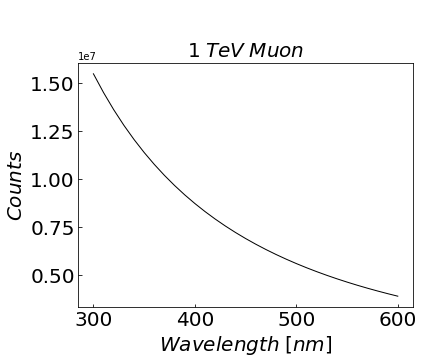

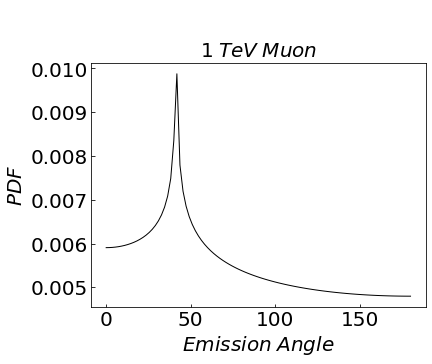

In [10]:
# Plotting some track stuff
# Photon counts
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
ax1.plot(wavelengths, track_counts / np.diff(wavelengths)[0], linewidth=lw, color='k')
# ---------------------------------------------
# Plotting options
ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_xlabel(r'$Wavelength\;[nm]$', fontsize=fontsize)
ax1.set_ylabel(r'$Counts$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.5, +1.27),
                  ncol=3, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.set_title("$1\;TeV\;Muon$", fontsize=fontsize)
# ax1.set_xlim(500, 600)
# ax1.set_ylim(1e-3, 1e2)
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "Single_Track_Wavelength.png",
               bbox_inches='tight', dpi=export_dpi)
# ----------------------------------------------
# ----------------------------------------------
# Angles
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
ax1.plot(angle_grid, track_angles / np.trapz(track_angles, x=angle_grid),
         linewidth=lw, color='k')
# ---------------------------------------------
# Plotting options
ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_xlabel(r'$Emission\;Angle$', fontsize=fontsize)
ax1.set_ylabel(r'$PDF$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.5, +1.27),
                  ncol=3, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.set_title("$1\;TeV\;Muon$", fontsize=fontsize)
# ax1.set_xlim(500, 600)
# ax1.set_ylim(1e-3, 1e2)
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "Single_Track_Angle.png",
               bbox_inches='tight', dpi=export_dpi)

In [11]:
# Electromagnetic Cascade
em_counts, em_long, em_angles = fennel_instance.em_yields(energy=test_energy, particle=11, mean=True)
em_counts_single, _, _ = fennel_instance.em_yields(energy=test_energy, particle=11, mean=False)

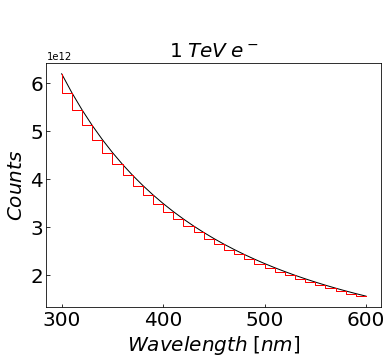

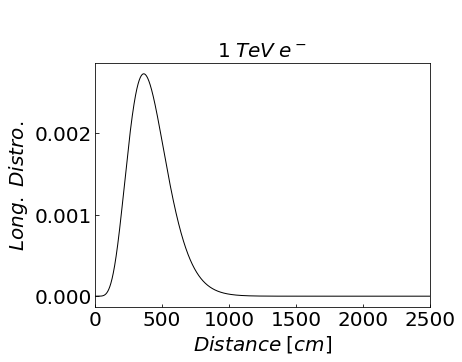

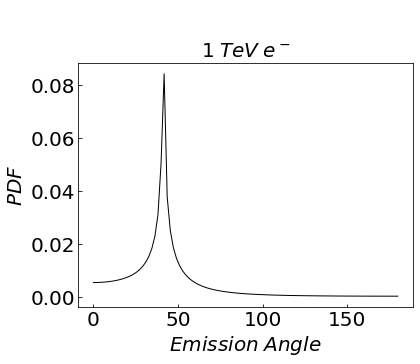

In [12]:
# Plotting some EM stuff
# Photon counts
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
ax1.plot(wavelengths, em_counts / np.diff(wavelengths)[0], linewidth=lw, color='k')
ax1.step(wavelengths, em_counts_single / np.diff(wavelengths)[0], linewidth=lw, color='r')
# ---------------------------------------------
# Plotting options
ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_xlabel(r'$Wavelength\;[nm]$', fontsize=fontsize)
ax1.set_ylabel(r'$Counts$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.5, +1.27),
                  ncol=3, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.set_title("$1\;TeV\;e^-$", fontsize=fontsize)
# ax1.set_xlim(500, 600)
# ax1.set_ylim(1e-3, 1e2)
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "Single_EM_Wavelength.png",
               bbox_inches='tight', dpi=export_dpi)
# ----------------------------------------------
# ----------------------------------------------
# Long
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
ax1.plot(zgrid, em_long / np.trapz(em_long, x=zgrid),
         linewidth=lw, color='k')
# ---------------------------------------------
# Plotting options
ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_xlabel(r'$Distance\;[cm]$', fontsize=fontsize)
ax1.set_ylabel(r'$Long.\;Distro.$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.5, +1.27),
                  ncol=3, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.set_title("$1\;TeV\;e^-$", fontsize=fontsize)
ax1.set_xlim(0, 2500)
# ax1.set_ylim(1e-3, 1e2)
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "Single_EM_Long.png",
               bbox_inches='tight', dpi=export_dpi)
# ----------------------------------------------
# ----------------------------------------------
# Angles
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
ax1.plot(angle_grid, em_angles / np.trapz(em_angles, x=angle_grid),
         linewidth=lw, color='k')
# ---------------------------------------------
# Plotting options
ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_xlabel(r'$Emission\;Angle$', fontsize=fontsize)
ax1.set_ylabel(r'$PDF$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.5, +1.27),
                  ncol=3, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.set_title("$1\;TeV\;e^-$", fontsize=fontsize)
# ax1.set_xlim(500, 600)
# ax1.set_ylim(1e-3, 1e2)
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "Single_EM_Angle.png",
               bbox_inches='tight', dpi=export_dpi)

In [15]:
# Hadron Cascade
had_counts, had_long, had_em, had_angles = fennel_instance.hadron_yields(energy=test_energy, particle=211, mean=True)
had_counts_single, _, had_em_single, _ = fennel_instance.hadron_yields(energy=test_energy, particle=211, mean=False)
samples = 10000
em_frac_samples = []
for i in tqdm(range(samples)):
    _, _, had_em_single, _ = fennel_instance.hadron_yields(energy=test_energy, particle=211, mean=False)
    em_frac_samples.append(had_em_single)

100%|██████████| 10000/10000 [00:16<00:00, 596.57it/s]


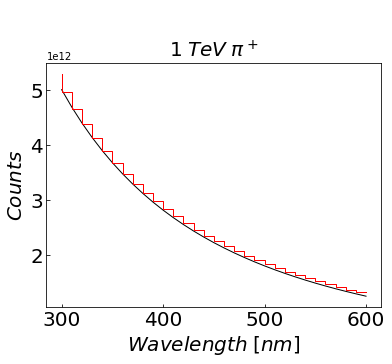

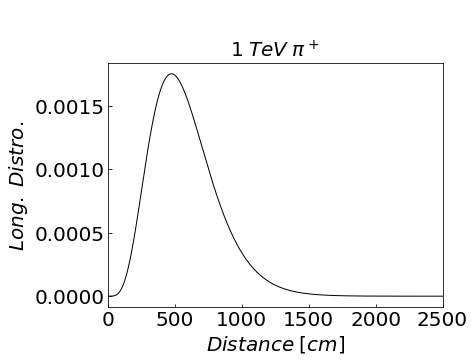

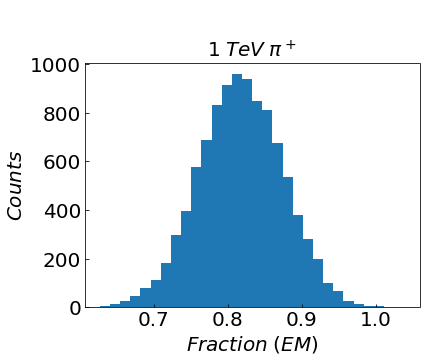

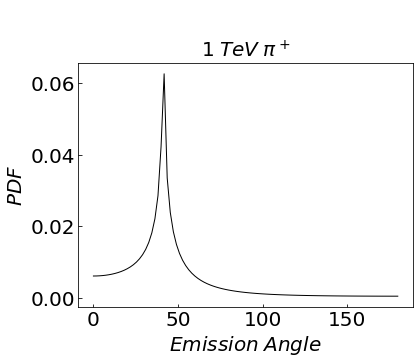

In [16]:
# Plotting some hadron stuff
# Photon counts
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
ax1.plot(wavelengths, had_counts / np.diff(wavelengths)[0], linewidth=lw, color='k')
ax1.step(wavelengths, had_counts_single / np.diff(wavelengths)[0], linewidth=lw, color='r')
# ---------------------------------------------
# Plotting options
ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_xlabel(r'$Wavelength\;[nm]$', fontsize=fontsize)
ax1.set_ylabel(r'$Counts$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.5, +1.27),
                  ncol=3, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.set_title("$1\;TeV\;\pi^+$", fontsize=fontsize)
# ax1.set_xlim(500, 600)
# ax1.set_ylim(1e-3, 1e2)
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "Single_Had_Wavelength.png",
               bbox_inches='tight', dpi=export_dpi)
# ----------------------------------------------
# ----------------------------------------------
# Long
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
ax1.plot(zgrid, had_long / np.trapz(had_long, x=zgrid),
         linewidth=lw, color='k')
# ---------------------------------------------
# Plotting options
ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_xlabel(r'$Distance\;[cm]$', fontsize=fontsize)
ax1.set_ylabel(r'$Long.\;Distro.$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.5, +1.27),
                  ncol=3, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.set_title("$1\;TeV\;\pi^+$", fontsize=fontsize)
ax1.set_xlim(0, 2500)
# ax1.set_ylim(1e-3, 1e2)
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "Single_Had_Long.png",
               bbox_inches='tight', dpi=export_dpi)
# ----------------------------------------------
# ----------------------------------------------
# Fraction
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
count, bins, ignored = ax1.hist(np.array(em_frac_samples).flatten(), 30, density=False)
# ---------------------------------------------
# Plotting options
ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_xlabel(r'$Fraction\;(EM)$', fontsize=fontsize)
ax1.set_ylabel(r'$Counts$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.5, +1.27),
                  ncol=3, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.set_title("$1\;TeV\;\pi^+$", fontsize=fontsize)
# ax1.set_xlim(0, 2500)
# ax1.set_ylim(1e-3, 1e2)
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "Single_Had_Frac.png",
               bbox_inches='tight', dpi=export_dpi)
# ----------------------------------------------
# ----------------------------------------------
# Angles
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
ax1.plot(angle_grid, had_angles / np.trapz(had_angles, x=angle_grid),
         linewidth=lw, color='k')
# ---------------------------------------------
# Plotting options
ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_xlabel(r'$Emission\;Angle$', fontsize=fontsize)
ax1.set_ylabel(r'$PDF$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.5, +1.27),
                  ncol=3, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.set_title("$1\;TeV\;\pi^+$", fontsize=fontsize)
# ax1.set_xlim(500, 600)
# ax1.set_ylim(1e-3, 1e2)
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "Single_Had_Angle.png",
               bbox_inches='tight', dpi=export_dpi)